# Tutorial 5.1 Q3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
data = pd.read_csv("Tut51Q3.csv")
data.head()

,Company,X1,X2
0,Citgroup,108.28,17.05
1,General Electric,152.36,16.59
2,AIG,95.04,10.91
3,Bank of America,65.45,14.14
4,HSBC Group,62.97,9.52


In [3]:
data = data.drop('Company', axis=1)

In [4]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data)

In [5]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components (eigenvectors) of the sample covariance matrix
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [6]:
pca_results

,Eigenvalue,Explained Variance,X1,X2
PC 1,7488.8061,0.9982,0.9992,0.0407
PC 2,13.8375,0.0018,-0.0407,0.9992


In [7]:
#Obtain scores from original data that are not centred

scores_notcentred = np.dot(data, pca.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2'])
scores_notcentred.head()

,PC1,PC2
0,108.883604,12.634145
1,152.908467,10.382601
2,95.404948,7.037449
3,65.970712,11.467661
4,63.304951,6.952296


In [8]:
# Plots score plot.
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the score plot

def scoreplot(data, scores, pca, width=10, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

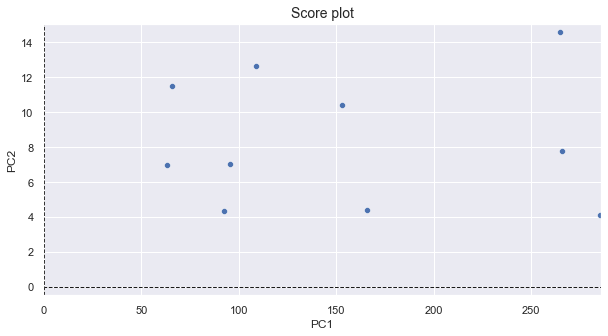

In [9]:
plt.clf
ax4 = scoreplot(data, scores_notcentred, pca)
plt.show()

In [10]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

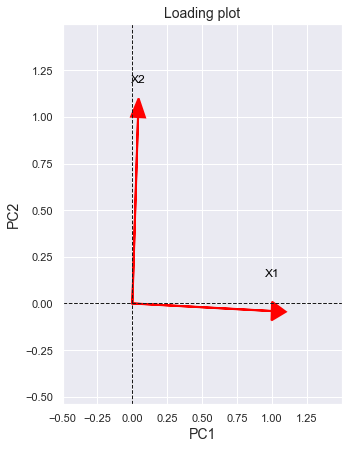

In [11]:
plt.clf
ax5 = loadingplot(data, pca, width=5, height=7)
plt.show()

PCA of Correlation Matrix (R)

In [12]:
R = np.corrcoef(data,rowvar=0)
R

array([[1.        , 0.68613603],
       [0.68613603, 1.        ]])

In [13]:
eigvals, eigvecs = np.linalg.eig(R)
print("Eigenvalues are: ", eigvals)
print("Eigenvectors are: \n", eigvecs)

Eigenvalues are:  [0.31386397 1.68613603]
Eigenvectors are: 
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [14]:
#standardisation
from sklearn.preprocessing import scale
data_scaled = scale(data)
data_scaled

array([[-0.57690354,  0.48321053],
       [-0.03953465,  0.38846337],
       [-0.73830926, -0.78145812],
       [-1.09903397, -0.11616826],
       [-1.12926707, -1.06775932],
       [ 1.32132037,  2.18865945],
       [ 1.33594929,  0.79010894],
       [ 1.57817977,  0.21132737],
       [-0.77524727, -1.36023969],
       [ 0.12284633, -0.73614426]])

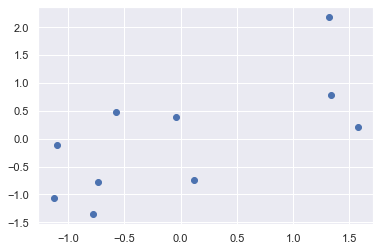

In [15]:
plt.scatter(data_scaled[:,0],data_scaled[:,1])

<hr>

## Tutorial 5.2 Q4

In [17]:
usafood = pd.read_csv('Tut52Q4.csv')
usafood

,City,Bread,Burger,Milk,Oranges,Tomatoes
0,Atlanta,24.5,94.5,73.9,80.1,41.6
1,Baltimore,26.5,91.0,67.5,74.6,53.3
2,Boston,29.7,100.8,61.4,104.0,59.6
3,Buffalo,22.8,86.6,65.3,118.4,51.2
4,Chicago,26.7,86.7,62.7,105.9,51.2
5,Cincinnati,25.3,102.5,63.3,99.3,45.6
6,Cleveland,22.8,88.8,52.4,110.9,46.8
7,Dallas,23.3,85.5,62.5,117.9,41.8
8,Detroit,24.1,93.7,51.5,109.7,52.4
9,Honolulu,29.3,105.9,80.2,133.2,61.7


In [18]:
usafood_reduced = usafood.drop('City',axis=1)

In [20]:
# scaling the data before PCA
from sklearn.preprocessing import scale
usafood_reduced = pd.DataFrame(scale(usafood_reduced), columns=['Bread','Burger','Milk','Oranges','Tomatoes'])
usafood_reduced.head()

,Bread,Burger,Milk,Oranges,Tomatoes
0,-0.322747,0.357765,1.707156,-1.643751,-0.963643
1,0.492987,-0.115920,0.765630,-2.038688,0.609878
2,1.798161,1.210398,-0.131763,0.072431,1.457158
3,-1.016120,-0.711410,0.441980,1.106449,0.327451
4,0.574560,-0.697876,0.059485,0.208864,0.327451


In [21]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(usafood_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(usafood_reduced)

In [23]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # PCA cum explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)
pca_results = pca_results(usafood_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Bread,Burger,Milk,Oranges,Tomatoes
PC 1,2.5326,0.4845,0.4845,0.4961,0.5757,0.3396,0.2250,0.5064
PC 2,1.1549,0.2209,0.7054,0.3086,0.0438,0.4308,-0.7968,-0.2870
PC 3,0.7720,0.1477,0.8531,-0.3864,-0.2625,0.8346,0.2916,-0.0123
PC 4,0.5160,0.0987,0.9518,-0.5093,0.0281,-0.0491,-0.4790,0.7127
PC 5,0.2517,0.0482,1.0000,-0.4999,0.7726,0.0079,-0.0060,-0.3912


<Figure size 432x288 with 0 Axes>

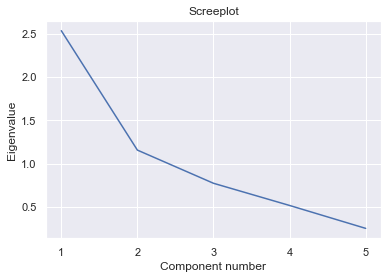

In [24]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [25]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(usafood_reduced)
scores2 = pca2.transform(usafood_reduced)

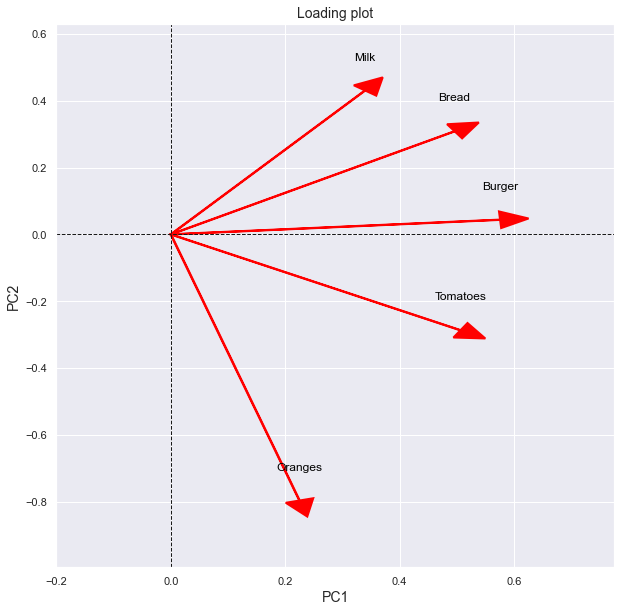

In [26]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax
plt.clf
ax2 = loadingplot(usafood_reduced, pca2, width=10, height=10, margin=0.2)
plt.show()

In [31]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(usafood_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

,PC1,PC2
0,-0.232315,2.237819
1,0.288023,1.926235
2,2.298492,0.075243
3,-0.348852,-1.129927
4,0.116322,-0.088027


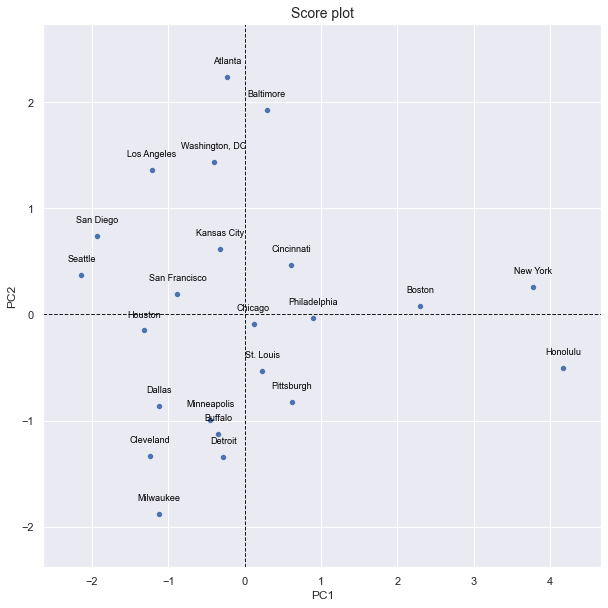

In [33]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=10, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    text_pos = 0.15
    # Print text
    for i, v in enumerate(np.array(scores)):
        ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=9)
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf
ax3= scoreplot_label(usafood,scores2_notcentred,pca)
plt.show()